This is my Jupyter notebook for the Week 2-3 mini project for Astro 503 at the University of North Carolina at Chapel Hill. 

In this notebook, I will be looking at data from the RESOLVE and ECO galaxy surveys.

In [58]:
# standard imports and naming conventions; uncomment as needed
import numpy as np              # basic numerical analysis
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats     # statistical functions
from astroML.plotting import scatter_contour

%matplotlib inline

Next I will retrieve my data from the ECO DR1 database.

My SQL querry was:
select name, cz, logmstar, modelu_rcorr, r90, morphel, grpcz, fc, logmh, den1mpc , absrmag

I saved the results to a file named mini_ECO.csv, which I will now read in below.

In [59]:
data = np.genfromtxt("mini_ECO.csv", delimiter=",", dtype=None, names=True) # better than np.loadtxt if have column names
data.dtype.names

('NAME',
 'CZ',
 'LOGMSTAR',
 'MODELU_RCORR',
 'R90',
 'MORPHEL',
 'GRPCZ',
 'FC',
 'LOGMH',
 'DEN1MPC',
 'ABSRMAG')

Next we will peel off Early and Late morphology galaxies into two data sets

In [60]:
mass = data['LOGMSTAR']
urColor = data['MODELU_RCORR']

sel = np.where((urColor > -99) & (mass > 0) & (mass > 9.))

data = data[sel]

mass = data['LOGMSTAR']
density = data['DEN1MPC']
urColor = data['MODELU_RCORR']
radius = data['R90']
groupV = data['GRPCZ']
mag = data['ABSRMAG']

earlyIndex = np.where(data['MORPHEL']=='E')
lateIndex = np.where(data['MORPHEL']=='L')

earlyMass = mass[earlyIndex]
earlyDensity = density[earlyIndex]
earlyColor = urColor[earlyIndex]
earlyRadius = radius[earlyIndex]
earlyV = groupV[earlyIndex]
earlyMag = mag[earlyIndex]

lateMass = mass[lateIndex]
lateDensity = density[lateIndex]
lateColor = urColor[lateIndex]
lateRadius = radius[lateIndex]
lateV = groupV[lateIndex]
lateMag = mag[lateIndex]

Now we just need to plot some thigs.

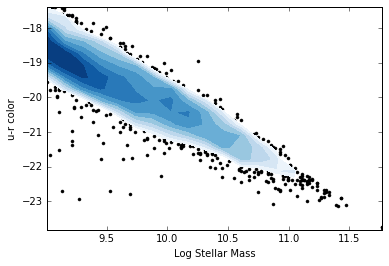

In [65]:
fig1, axcolormstar = plt.subplots()
axcolormstar = plt.axes()
#axcolormstar.plot(lateMass,lateMag,'g.')
scatter_contour(lateMass, lateMag, threshold=20, log_counts=True, ax=axcolormstar,
                histogram2d_args=dict(bins=20),
                plot_args=dict(marker='.', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.Blues))
axcolormstar.set_xlabel("Log Stellar Mass")
axcolormstar.set_ylabel("u-r color")
#axcolormstar.plot([10.5,10.5],[min(urcolor),max(urcolor)])

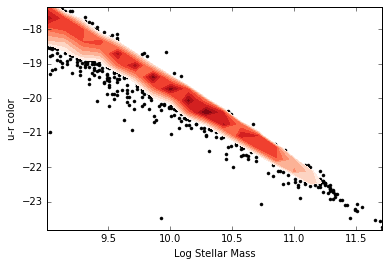

In [66]:
fig2, axcolormstar = plt.subplots()
axcolormstar = plt.axes()
#axcolormstar.plot(logmstar,urcolor,'g.')
scatter_contour(earlyMass, earlyMag, threshold=20, log_counts=True, ax=axcolormstar,
                histogram2d_args=dict(bins=20),
                plot_args=dict(marker='.', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.Reds))
axcolormstar.set_xlabel("Log Stellar Mass")
axcolormstar.set_ylabel("u-r color")
#axcolormstar.plot([10.5,10.5],[min(urcolor),max(urcolor)])

(array([ 0.00084178,  0.00925953,  0.03787989,  0.10550252,  0.19052183,
         0.28676482,  0.36841704,  0.36925881,  0.15797318,  0.02637563]),
 array([-23.82 , -23.176, -22.532, -21.888, -21.244, -20.6  , -19.956,
        -19.312, -18.668, -18.024, -17.38 ]),
 <a list of 10 Patch objects>)

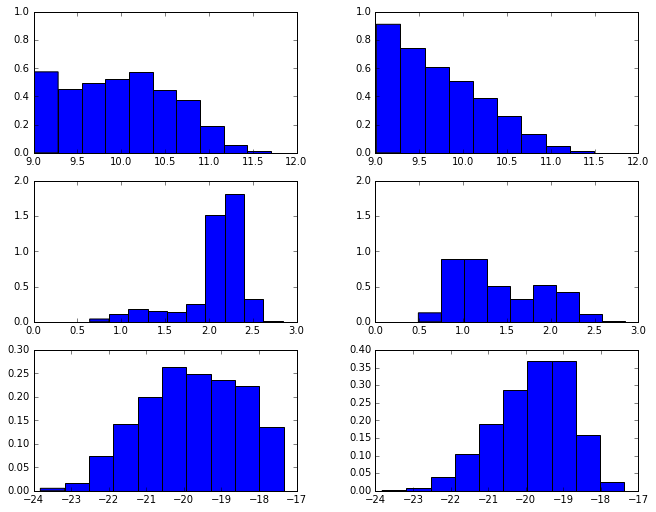

In [63]:
fig3 = plt.figure(figsize=(10, 5))
fig3.subplots_adjust(left=0.11, right=0.95, wspace=0.3, bottom=0.17, top=1.5)

ax = fig3.add_subplot(321)
ax.hist(earlyMass, normed=1)
ax.set_xlim(9, 12)
ax.set_ylim(0, 1)

ax = fig3.add_subplot(322)
ax.hist(lateMass, normed=1)
ax.set_xlim(9, 12)
ax.set_ylim(0, 1)


ax = fig3.add_subplot(323)
ax.hist(earlyColor, normed=1)
ax.set_xlim(0, 3)
ax.set_ylim(0, 2)

ax = fig3.add_subplot(324)
ax.hist(lateColor, normed=1)
ax.set_xlim(0, 3)
ax.set_ylim(0, 2)


ax = fig3.add_subplot(325)
ax.hist(earlyMag, normed=1)
#ax.set_xlim(0, 3)
#ax.set_ylim(0, 0.035)

ax = fig3.add_subplot(326)
ax.hist(lateMag, normed=1)
#ax.set_xlim(0, 3)
#ax.set_ylim(0, 0.035)

